In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load the dataset 
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

In [3]:
# Determine columns to drop by number of null values
thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()

In [4]:
df_num = df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
# df_num.info()
# df_obj.info()

# df_obj = df

single_planet_exosystem
True     1674
False    1408
Name: count, dtype: int64
single_planet_exosystem
True     54.31538
False    45.68462
Name: count, dtype: float64


,discoverymethod_Orbital Brightness Modulation,discoverymethod_Radial Velocity,discoverymethod_Transit,discoverymethod_Transit Timing Variations,disc_facility_CHaracterising ExOPlanets Satellite (CHEOPS),disc_facility_Calar Alto Observatory,disc_facility_Cerro Tololo Inter-American Observatory,disc_facility_CoRoT,disc_facility_Fred Lawrence Whipple Observatory,disc_facility_Gemini Observatory,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,False,False,False,False,False,False,False,False,False,True,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,False,True,False,False,False,False,False,False,False,False,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,False,True,False,False,False,False,False,False,False,False,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,False,False,True,False,False,False,False,False,False,False,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,False,False,True,False,False,False,False,False,False,False,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


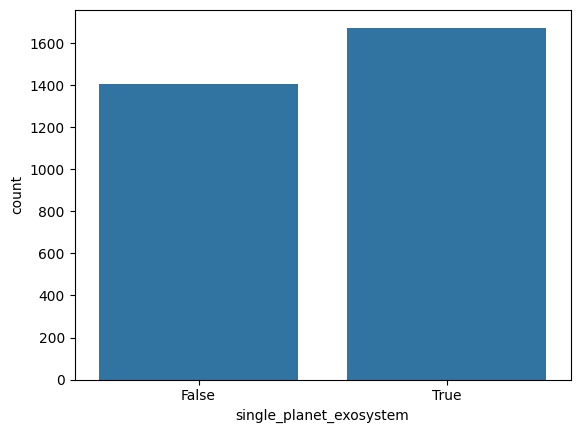

In [5]:
df_obj = pd.get_dummies(df_obj, drop_first=True)
df = df_obj.join(df_num)
print(df['single_planet_exosystem'].value_counts())
print( (df['single_planet_exosystem'].value_counts()/ df['single_planet_exosystem'].value_counts().sum()) * 100)
sns.countplot(data=df, x='single_planet_exosystem')
df.head()

In [6]:
attr = df.drop('single_planet_exosystem', axis=1)
target = df['single_planet_exosystem']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=30)

In [8]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.8486486486486486  

 Confusion Matrix:
[[321 107]
 [ 33 464]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.75      0.82       428
        True       0.81      0.93      0.87       497

    accuracy                           0.85       925
   macro avg       0.86      0.84      0.84       925
weighted avg       0.86      0.85      0.85       925



In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);